<a href="https://colab.research.google.com/github/DhirajBembade/Multi-Class-Cuisine-Classification/blob/main/Multi_Class_Multi_Label_Cuisine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have dataset with category as one of feature in the dataset.This feature give information about the type of cuisine.This feature consist of various names of resturants and there cuisine type, this dataset is multiclass and multilabel,here we have to perform classification task on it to classifiy the names of cuisine from dataset.Here we have to classify which resturant serving which cuisine type and at the end we have to list it down the cuisines in the dataset.

## **#Loading Libraries and Data -**

In [3]:
# Data processing, Linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

#Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
warnings.filterwarnings("ignore")

#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer

# **#Mounting Dataset 📂-**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Datafiniti_Fast_Food_Restaurants_May19.csv')

In [5]:
data

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.396290,-104.696990,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.081350,-108.586890,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.091480,-108.554110,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.740440,-104.926360,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwd7U0T_7pvs4fz-fS_,2016-05-31T13:33:45Z,2018-12-03T09:04:19Z,1803 Carolina Ave,"American Restaurants,Caterers,Soul Food Restau...",Accommodation & Food Services,Bessemer,US,us/al/bessemer/1803carolinaave/785498836,33.399574,-86.951050,Church's Chicken Of Birmingham,35020,AL,http://www.yellowpages.com/bessemer-al/mip/chu...,http://www.churchs.com
9996,AV1XW1fF3D1zeR_xFKHL,2017-07-18T20:19:50Z,2018-12-02T00:08:36Z,8511 Cantilever Way Ste 105,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Accommodation & Food Services,Raleigh,US,us/nc/raleigh/8511cantileverwayste105/-1596320866,35.884500,-78.737541,Luxury Box,27613-6996,NC,https://www.bbb.org/us/nc/raleigh/profile/spor...,"http://www.theluxuryboxofraleigh.com,http://th..."
9997,AV5UVbkiRxPSIh2RiQxV,2017-09-05T23:05:50Z,2018-12-01T07:38:03Z,2601 Plover Rd,"Carry-out food,Hot dog restaurants,Fast Food R...",Accommodation & Food Services,Plover,US,us/wi/plover/2601ploverrd/-1161002137,44.453180,-89.543170,McDonald's,54467,WI,https://www.yellowpages.com/plover-wi/mip/mcdo...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
9998,AVwc9BxYByjofQCxj_GW,2016-03-31T02:43:12Z,2018-12-01T07:35:22Z,170 E Main St,"Carry-out food,Caterers,Restaurant delivery se...",Accommodation & Food Services,Hendersonville,US,us/tn/hendersonville/170emainst/-66712705,36.308262,-86.607339,Pizza Hut,37075,TN,https://foursquare.com/v/pizza-hut/4c5fffd43a3...,http://www.pizzahut.com


In [6]:
print(f"Shape of Dataframe is: {data.shape}")

Shape of Dataframe is: (10000, 16)


In [7]:
data.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'sourceURLs', 'websites'],
      dtype='object')

In [8]:
# looking for datatypes present in each column from our dataset
print("Datatype in Each Column : \n")
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis("Column Name")

Datatype in Each Column : 



,Datatype
Column Name,
id,object
dateAdded,object
dateUpdated,object
address,object
categories,object
primaryCategories,object
city,object
country,object
keys,object


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   dateAdded          10000 non-null  object 
 2   dateUpdated        10000 non-null  object 
 3   address            10000 non-null  object 
 4   categories         10000 non-null  object 
 5   primaryCategories  10000 non-null  object 
 6   city               10000 non-null  object 
 7   country            10000 non-null  object 
 8   keys               10000 non-null  object 
 9   latitude           10000 non-null  float64
 10  longitude          10000 non-null  float64
 11  name               10000 non-null  object 
 12  postalCode         10000 non-null  object 
 13  province           10000 non-null  object 
 14  sourceURLs         10000 non-null  object 
 15  websites           9918 non-null   object 
dtypes: float64(2), object(1

In [10]:
# Looking for null value in the dataset-
pd.DataFrame(data.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
id,0
dateAdded,0
dateUpdated,0
address,0
categories,0
primaryCategories,0
city,0
country,0
keys,0


In [11]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have a DataFrame named df
fig = go.Figure(data=[go.Bar(x=data.columns, y=data.isnull().sum())])
fig.update_layout(title='Missing Values', xaxis_title='Columns', yaxis_title='Count')
fig.show()


In [12]:
data.describe(include = "all")

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,10000,9918
unique,10000,9455,9327,9954,5670,1,2810,1,10000,NaN,NaN,1545,5310,47,10000,6215
top,AWrSh_KgsVYjT2BJAzaH,2017-06-19T15:23:44Z,2019-04-14T06:22:30Z,2005 Kalia Rd,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Columbus,US,us/co/greeley/255511thavenue/554191587,NaN,NaN,McDonald's,37040,OH,https://www.yellowpages.com/greeley-co/mip/car...,http://www.subway.com
freq,1,5,9,4,182,10000,105,10000,1,NaN,NaN,765,17,922,1,393
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.298215,-93.284547,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.566995,16.421424,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.639560,-159.464310,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.850652,-98.342758,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.490189,-86.677452,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.808905,-81.803061,NaN,NaN,NaN,NaN,NaN


In [13]:
data.describe(include = ['O']).T

,count,unique,top,freq
id,10000,10000,AWrSh_KgsVYjT2BJAzaH,1
dateAdded,10000,9455,2017-06-19T15:23:44Z,5
dateUpdated,10000,9327,2019-04-14T06:22:30Z,9
address,10000,9954,2005 Kalia Rd,4
categories,10000,5670,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",182
primaryCategories,10000,1,Accommodation & Food Services,10000
city,10000,2810,Columbus,105
country,10000,1,US,10000
keys,10000,10000,us/co/greeley/255511thavenue/554191587,1
name,10000,1545,McDonald's,765


In [14]:
data.duplicated().sum()

0

In [15]:
data['categories'].value_counts()

Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants                                                                                                                                                                                 182
Fast Food                                                                                                                                                                                                                                 146
Ice Cream Parlors,Breakfast,Fast Food,Coffeehouses,Salads,Hamburgers,Restaurants,Sandwich Shops                                                                                                                                           140
Fast Food,Chicken,Restaurants                                                                                                                                                                                                              93
Fast Food Restaurants,Restaurants,Sandwich Shops

In [16]:
data.shape

(10000, 16)

In [17]:
data.primaryCategories.value_counts()


Accommodation & Food Services    10000
Name: primaryCategories, dtype: int64

In [18]:
# address, city, country, lattitude, longitude, name, postal code, province, website
data["detailed_address"] = data["name"] + data["address"]+  data["city"] + data["country"]+ data["latitude"].astype(str) + data["longitude"].astype(str)+ data["postalCode"] +["province"] + data["websites"]


# **#Required DataFrame**

In [19]:
df = data[["detailed_address","categories"]]

In [20]:
df["categories"] = df["categories"].map(lambda x: x.lower())
df.head()


,detailed_address,categories
0,Carl's Jr.2555 11th AvenueGreeleyUS40.39629-10...,"fast food restaurants,hamburgers and hot dogs,..."
1,Del Taco2513 Highway 6 And 50Grand JunctionUS3...,"restaurant,mexican restaurants,fast food resta..."
2,Which Wich1125 Patterson RoadGrand JunctionUS3...,"sandwich shops,fast food restaurants,restauran..."
3,Chipotle Mexican Grill3455 N Salida CourtAuror...,"fast food restaurants,mexican restaurants,rest..."
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-...,"fast food restaurants,mexican restaurants,rest..."


In [21]:
new_df = pd.concat([df.drop('categories', 1), df['categories'].str.get_dummies(sep=",")], 1)
new_df.head()

,detailed_address,american restaurant,and airport,and airport devonshire,and american restaurant,and american restaurant canoga park,and american restaurant cape fear,and american restaurant downtown blacksburg,and asian restaurant,and bakery,...,wings joint,wings joint and bbq joint,wings joint and fried chicken joint,wings joint cypress station,women's clothing,wy\\mexican restaurant,yogurt,yogurt manufacturers,youngstown restaurants,yuma restaurants
0,Carl's Jr.2555 11th AvenueGreeleyUS40.39629-10...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Del Taco2513 Highway 6 And 50Grand JunctionUS3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Which Wich1125 Patterson RoadGrand JunctionUS3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chipotle Mexican Grill3455 N Salida CourtAuror...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Removing 'and' from column names
new_df.columns = [col.replace('and', '') for col in new_df.columns]


In [23]:
df["detailed_address"]=df["detailed_address"].astype(str).map(lambda x:x.lower())

In [24]:
#df['categories'] = df['categories'].apply(lambda x: x.split(', '))
df

,detailed_address,categories
0,carl's jr.2555 11th avenuegreeleyus40.39629-10...,"fast food restaurants,hamburgers and hot dogs,..."
1,del taco2513 highway 6 and 50grand junctionus3...,"restaurant,mexican restaurants,fast food resta..."
2,which wich1125 patterson roadgrand junctionus3...,"sandwich shops,fast food restaurants,restauran..."
3,chipotle mexican grill3455 n salida courtauror...,"fast food restaurants,mexican restaurants,rest..."
4,taco bell5225 e colfax avenuedenverus39.74044-...,"fast food restaurants,mexican restaurants,rest..."
...,...,...
9995,church's chicken of birmingham1803 carolina av...,"american restaurants,caterers,soul food restau..."
9996,luxury box8511 cantilever way ste 105raleighus...,"mexican restaurants,caterers,delicatessens,iri..."
9997,mcdonald's2601 plover rdploverus44.45318-89.54...,"carry-out food,hot dog restaurants,fast food r..."
9998,pizza hut170 e main sthendersonvilleus36.30826...,"carry-out food,caterers,restaurant delivery se..."


In [25]:
new_df.shape

(10000, 1561)

In [26]:
new_df.head()

,detailed_address,american restaurant,airport,airport devonshire,american restaurant,american restaurant canoga park,american restaurant cape fear,american restaurant downtown blacksburg,asian restaurant,bakery,...,wings joint,wings joint bbq joint,wings joint fried chicken joint,wings joint cypress station,women's clothing,wy\\mexican restaurant,yogurt,yogurt manufacturers,youngstown restaurants,yuma restaurants
0,Carl's Jr.2555 11th AvenueGreeleyUS40.39629-10...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Del Taco2513 Highway 6 And 50Grand JunctionUS3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Which Wich1125 Patterson RoadGrand JunctionUS3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chipotle Mexican Grill3455 N Salida CourtAuror...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
new_df["detailed_address"] = new_df["detailed_address"].astype(str).map(lambda x: x.lower())
new_df.head()

,detailed_address,american restaurant,airport,airport devonshire,american restaurant,american restaurant canoga park,american restaurant cape fear,american restaurant downtown blacksburg,asian restaurant,bakery,...,wings joint,wings joint bbq joint,wings joint fried chicken joint,wings joint cypress station,women's clothing,wy\\mexican restaurant,yogurt,yogurt manufacturers,youngstown restaurants,yuma restaurants
0,carl's jr.2555 11th avenuegreeleyus40.39629-10...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,del taco2513 highway 6 and 50grand junctionus3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,which wich1125 patterson roadgrand junctionus3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chipotle mexican grill3455 n salida courtauror...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,taco bell5225 e colfax avenuedenverus39.74044-...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = new_df.columns[1:]
bar_plot['count'] = new_df.iloc[:,1:].sum().values
bar_plot.sort_values(['count'], inplace=True, ascending=False)
bar_plot.reset_index(inplace=True, drop=True)
bar_plot.head(10)

,cat,count
0,restaurants,9199
1,fast food restaurants,6885
2,restaurant,4489
3,take out restaurants,4405
4,american restaurants,3962
5,carry-out food,3644
6,fast food restaurant,3186
7,fast food,2733
8,swich shops,2714
9,hamburgers hot dogs,1900


In [29]:
bar_plot.shape

(1560, 2)

In [30]:
top_10_cat=bar_plot.nlargest(n=10,columns=["count"])
top_10_cat

,cat,count
0,restaurants,9199
1,fast food restaurants,6885
2,restaurant,4489
3,take out restaurants,4405
4,american restaurants,3962
5,carry-out food,3644
6,fast food restaurant,3186
7,fast food,2733
8,swich shops,2714
9,hamburgers hot dogs,1900


In [31]:
threshold = 500
colors = px.colors.qualitative.Plotly
fig = go.Figure(
    data=[
        go.Bar(
            x=top_10_cat['cat'],
            y=top_10_cat['count'],
            marker=dict(color=colors),
        )
    ]
)
fig.add_shape(
    type="line",
    x0=-0.5,
    y0=threshold,
    x1=len(top_10_cat) - 0.5,
    y1=threshold,
    line=dict(color="red", dash="dash"),
)
fig.update_layout(
    title="Most Common Categories",
    xaxis=dict(tickangle=-45),
    yaxis=dict(title="Number of Titles"),
    showlegend=False,
)
fig.show()

In [32]:
main_categories = pd.DataFrame()
main_categories = bar_plot[bar_plot['count']>200]
categories = main_categories['cat'].values
categories = np.append(categories,'Others')
not_category = []
new_df['Others'] = 0

for i in new_df.columns[1:]:
    if i not in categories:
        new_df['Others'][new_df[i] == 1] = 1
        not_category.append(i)

new_df.drop(not_category, axis=1, inplace=True)

In [33]:
most_common_cat = pd.DataFrame()
most_common_cat['cat'] = new_df.columns[1:]
most_common_cat['count'] = new_df.iloc[:,1:].sum().values
most_common_cat.sort_values(['count'], inplace=True, ascending=False)
most_common_cat.reset_index(inplace=True, drop=True)
most_common_cat.head()

,cat,count
0,restaurants,9199
1,fast food restaurants,6885
2,restaurant,4489
3,take out restaurants,4405
4,Others,4196


In [34]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=most_common_cat['cat'],
    y=most_common_cat['count'],
    marker=dict(color=most_common_cat['count'], colorscale='Viridis', showscale=True),
))
fig.add_shape(
    type="line",
    x0=-0.5,
    y0=threshold,
    x1=len(most_common_cat) - 0.5,
    y1=threshold,
    line=dict(
        color="red",
        dash="dash",
    ),
)
fig.update_layout(
    title="Most Common Categories",
    xaxis=dict(
        tickangle=-45,
        title="Genre"
    ),
    yaxis=dict(
        title="Number of Titles"
    ),
    showlegend=False,
    height=600,
    width=900,
)
fig.show()

In [35]:
rowSums = new_df.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

In [36]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Bar(
    x=multiLabel_counts.index,
    y=multiLabel_counts.values,
    marker=dict(
        color=multiLabel_counts.values,
        colorscale='Viridis',
        showscale=True,
    ),
))

fig.update_layout(
    title="Number of Categories per Title",
    xaxis=dict(title="Number of Categories"),
    yaxis=dict(title="Number of Titles"),
    showlegend=False,
    height=600,
    width=900,
)

fig.show()


In [37]:
boxplot = new_df.copy()
boxplot['len'] = new_df.detailed_address.apply(lambda x: len(x))

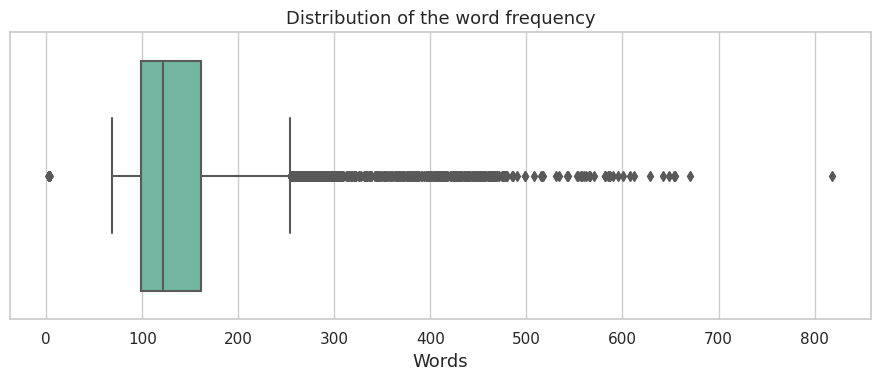

In [38]:
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})

plt.figure(figsize=(9, 4))

ax = sns.boxplot(x='len', data=boxplot, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Words')
plt.title("Distribution of the word frequency", fontsize=13)
plt.tight_layout(h_pad=3)

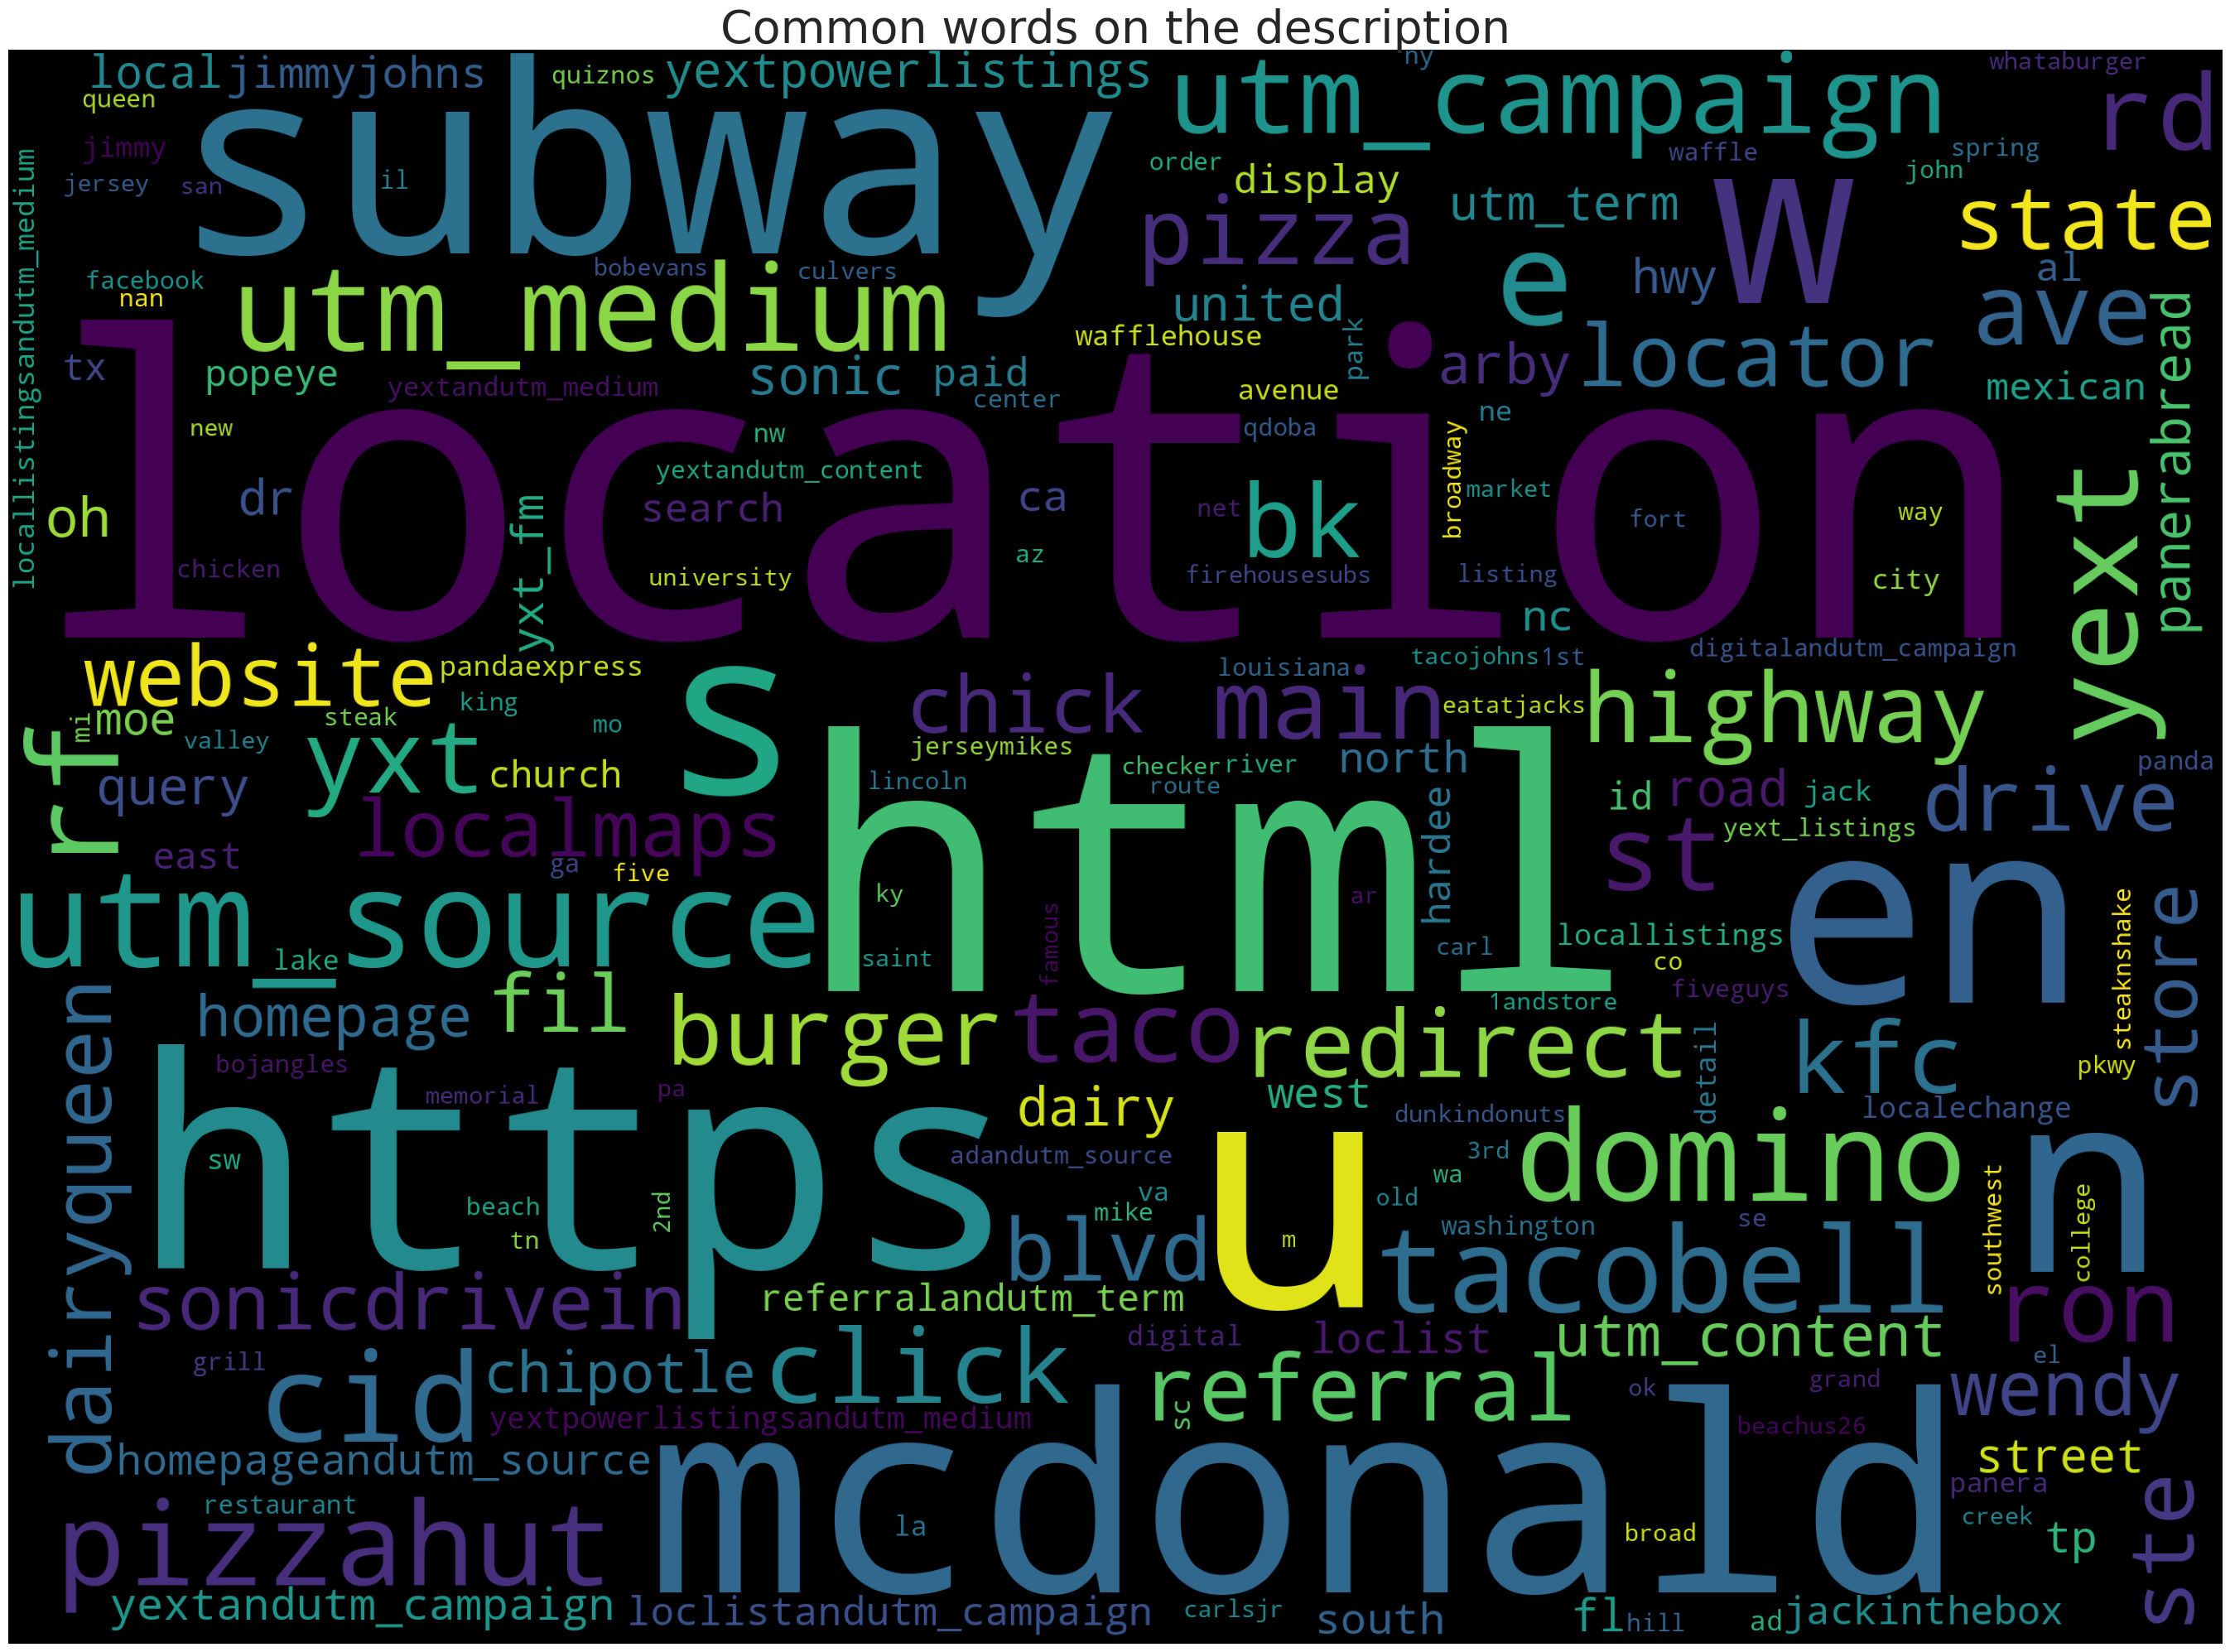

In [39]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))
text = new_df.detailed_address.values
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Common words on the description",fontsize=40)
plt.imshow(cloud)

In [40]:
df1= new_df.copy()

# NLP Data Preprocessing

Data Cleaning:

A] Clean HTML

B] RemovePunch

C] Remove Number

D] Remove Stopwords

E] Lemmatization

A] Clean HTML

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [42]:
#To summarize, the cleanHtml function takes a sentence as input, removes any HTML tags present in the sentence using regular expressions, and returns the cleaned text.
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
df1["detailed_address"]=df1["detailed_address"].apply(cleanHtml)



In [43]:
df1["detailed_address"][0]

"carl's jr.2555 11th avenuegreeleyus40.39629-104.6969980631provincehttps://www.carlsjr.com/?utm_source=yextandutm_medium=visit%20websiteandutm_campaign=homepage"

B] Remove Punctuation

In [44]:
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip() #The strip() method removes any leading, and trailing whitespaces.
    cleaned = cleaned.replace("\n"," ")
    return cleaned
df1["detailed_address"]=df1["detailed_address"].apply(cleanPunc)

In [45]:
df1["detailed_address"][0]

'carls jr 2555 11th avenuegreeleyus40 39629-104 6969980631provincehttps:  www carlsjr com utm_source=yextandutm_medium=visit%20websiteandutm_campaign=homepage'

C] Remove Number

In [46]:
def removeNumber(sentence):
  alpha_sent=""
  for word in sentence.split():
    alpha_word=re.sub('[^a-z A-Z]+', ' ', word)
    alpha_sent+=alpha_word
    alpha_sent+=" "
  alpha_sent=alpha_sent.strip()
  return alpha_sent
df1['detailed_address'] = df1['detailed_address'].apply(removeNumber)

D] Remove Stopwords

In [47]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

df1['detailed_address'] =df1['detailed_address'].apply(removeStopWords)
df1.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,detailed_address,american,american restaurant,american restaurants,asian restaurants,bakeries,barbecue,barbecued poultry,breakfast,breakfast brunch lunch restaurants,...,seafood restaurants,southwestern restaurants,spare rib restaurants,take out restaurants,takeout,tex-mex restaurants,traditional american,vegetarian,wich place,Others
0,carls jr th avenuegreeleyus provincehtt...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,del taco highway grand junctionus pro...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,wich patterson roadgrand junctionus prov...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,chipotle mexican grill n salida courtauroraus...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,taco bell e colfax avenuedenverus provinc...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


E] Lemmatization

In [48]:
from nltk.stem import 	WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
def Lemmatizer(sentence):
    lammiSentence = ""
    for word in sentence.split():
        lammi = wordnet_lemmatizer.lemmatize(word)
        lammiSentence += lammi
        lammiSentence += " "
    lammiSentence = lammiSentence.strip()
    return lammiSentence
df1['detailed_address'] =df1['detailed_address'].apply(Lemmatizer)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
df1['detailed_address'][0]

'carls jr th avenuegreeleyus provincehttps www carlsjr com utm source yextandutm medium visit websiteandutm campaign homepage'

 # **Train-Test Split-**

In [50]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(7000, 65)
(3000, 65)


In [51]:
train_text = train['detailed_address']
test_text = test['detailed_address']

# **TF-IDF-**

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [53]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
# vectorizer.fit(train_text)
# vectorizer.fit(test_text)

x_train = vectorizer.transform(train_text)
y_train = train.drop(labels =['detailed_address'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels =['detailed_address'], axis=1)

In [54]:
x_train.shape

(7000, 39159)

In [55]:
x_test.shape

(3000, 39159)

In [56]:
y_test.shape

(3000, 64)

# **#Multi-Label Classification**

## **Multiple Binary Classifications - (One Vs Rest Classifier)**

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [58]:
# %%time

# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.metrics import accuracy_score
# import time

# # Using pipeline for applying logistic regression and one vs rest classifier
# LogReg_pipeline = Pipeline([
#     ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
# ])

# start_time = time.time()

# for category in categories:
#     print('Processing {} comments...'.format(category))

#    # Training logistic regression model on train data
#     LogReg_pipeline.fit(x_train, train[category])

#     # calculating test accuracy
#     predict_train=LogReg_pipeline.predict(x_train)
#     prediction = LogReg_pipeline.predict(x_test)
#     print(print('Test accuracy is {}'.format(accuracy_score(test[category], prediction))))
#     print('Train accuracy is {}'.format(accuracy_score(train[category],predict_train)))
#     print("\n")

## **Multiple Binary Classifications - (Binary Relevance)**

Binary Relevance is a technique for multi-label classification that involves training one binary classifier for each label in the dataset. Any binary classifier can be used with this approach. For example, you could use an SVM classifier or a Naive Bayes classifier 1. The scikit-multilearn library provides an implementation of Binary Relevance that allows you to use any scikit-learn compatible base classifier

In [59]:
pip install scikit-multilearn

In [60]:
# from skmultilearn.problem_transform import BinaryRelevance
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score
# import time

# # Initialize binary relevance multi-label classifier
# # with a Gaussian naive Bayes base classifier
# classifier = BinaryRelevance(GaussianNB())

# start_time = time.time()

# # Train
# classifier.fit(x_train, y_train)

# # Predict
# predictions = classifier.predict(x_test)

# end_time = time.time()
# execution_time = end_time - start_time

# # Accuracy
# print("Accuracy =", accuracy_score(y_test, predictions))
# print("\n")
# print('Execution time: {} seconds'.format(execution_time))


In [61]:
# %%time

# # using binary relevance
# from skmultilearn.problem_transform import BinaryRelevance
# from sklearn.naive_bayes import GaussianNB

# # initialize binary relevance multi-label classifier
# # with a gaussian naive bayes base classifier
# classifier = BinaryRelevance(GaussianNB())

# # train
# classifier.fit(x_train, y_train)

# # predict
# predictions = classifier.predict(x_test)

# # accuracy
# print("Accuracy = ",accuracy_score(y_test,predictions))
# print("\n")

In [62]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [63]:
# %%time

# # initialize classifier chains multi-label classifier
# classifier = ClassifierChain(LogisticRegression())

# # Training logistic regression model on train data
# classifier.fit(x_train, y_train)

# # predict
# predictions = classifier.predict(x_test)

# # accuracy
# print("Accuracy = ",accuracy_score(y_test,predictions))
# print("\n")


In [64]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [65]:
# %%time

# # initialize label powerset multi-label classifier
# classifier = LabelPowerset(LogisticRegression())

# # train
# classifier.fit(x_train, y_train)

# # predict
# predictions = classifier.predict(x_test)

# # accuracy
# print("Accuracy = ",accuracy_score(y_test,predictions))
# print("\n")

In [66]:

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [ ]:
from skmultilearn.adapt import MLkNN
from sklearn.metrics import accuracy_score
from scipy.sparse import lil_matrix
import time

classifier_new = MLkNN(k=10)

start_time = time.time()

# Note that this classifier can throw up errors when handling sparse matrices.

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

end_time = time.time()
execution_time = end_time - start_time

# accuracy
print("Accuracy =", accuracy_score(y_test, predictions_new))
print("\n")
print('Execution time: {} seconds'.format(execution_time))
